In [2]:
import pandas as pd
import numpy as np

pd.core.common.is_list_like = pd.api.types.is_list_like 
import pandas_datareader.data as web


from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.plotly as py
import plotly
import plotly.graph_objs as go


import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [95]:
#download the data from IEX
download=web.DataReader('AAPL', 'iex', start='24.03.2014', 
                        end='10.08.2018')
                        
download.head(10)

5y


,open,high,low,close,volume
date,,,,,
2014-03-24,70.7117,70.9849,70.2704,70.8128,88924871
2014-03-25,71.1162,71.6744,70.8654,71.5746,70573356
2014-03-26,71.7755,72.1012,70.7695,70.8903,74942224
2014-03-27,70.9212,71.1162,70.2783,70.5856,55507676
2014-03-28,70.6986,70.7800,70.1641,70.5068,50141063
2014-03-31,70.8181,71.0256,70.3847,70.4911,42167188
2014-04-01,70.6250,71.1648,70.4950,71.1359,50189685
2014-04-02,71.2318,71.3763,70.9534,71.2541,44792195
2014-04-03,71.1018,71.2475,70.6093,70.7603,40648111


In [96]:
ts=pd.DataFrame({'close': download.close})
ts.tail(5)

,close
date,
2018-10-02,227.5069
2018-10-03,230.2754
2018-10-04,226.2269
2018-10-05,222.5555
2018-10-08,222.0396


In [97]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1146 entries, 2014-03-24 to 2018-10-08
Data columns (total 1 columns):
close    1146 non-null float64
dtypes: float64(1)
memory usage: 17.9+ KB


In [98]:
#make date as column
df1=ts.reset_index(level=0)
df1.tail(5)

,date,close
1141,2018-10-02,227.5069
1142,2018-10-03,230.2754
1143,2018-10-04,226.2269
1144,2018-10-05,222.5555
1145,2018-10-08,222.0396


In [99]:
plotly.tools.set_credentials_file(username='yuridadt', api_key='4FcDJ4LvVuyAz41urEPr')

data = [go.Scatter(x=df1.date, y=df1['close'])]

py.iplot(data, filename = 'time-series-simple')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~yuridadt/0 or inside your plot.ly account where it is named 'time-series-simple'


In [100]:
df=ts['close']
df.head(10)

date
2014-03-24    70.8128
2014-03-25    71.5746
2014-03-26    70.8903
2014-03-27    70.5856
2014-03-28    70.5068
2014-03-31    70.4911
2014-04-01    71.1359
2014-04-02    71.2541
2014-04-03    70.7603
2014-04-04    69.8449
Name: close, dtype: float64

## Checking for stationarity by Dickey-Fuller Test

In [101]:
plt.rcParams['figure.figsize'] = 30, 10
#test for stationarity

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    


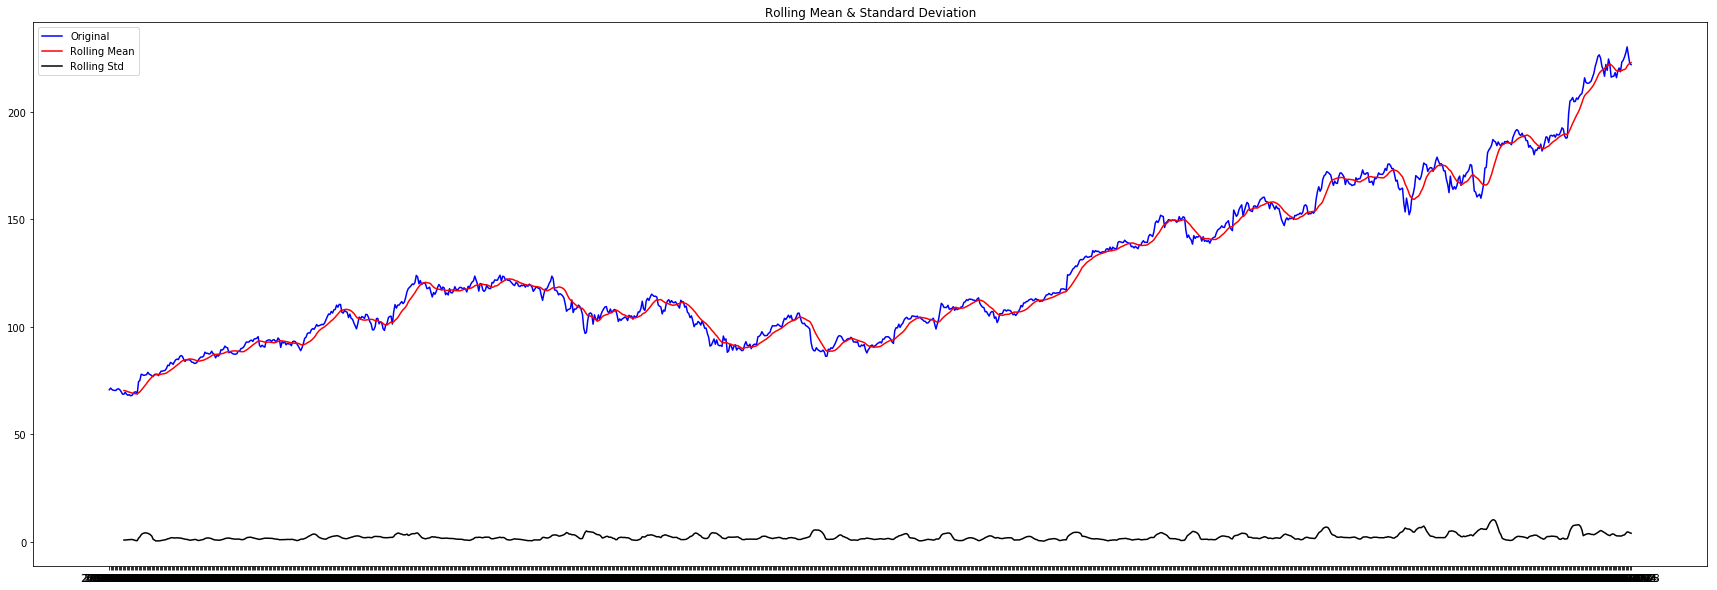

Results of Dickey-Fuller Test:
Test Statistic                    0.496311
p-value                           0.984761
#Lags Used                        1.000000
Number of Observations Used    1144.000000
Critical Value (1%)              -3.436079
Critical Value (5%)              -2.864070
Critical Value (10%)             -2.568117
dtype: float64


In [102]:
test_stationarity(df)

# Detrending

### Adding Moving average

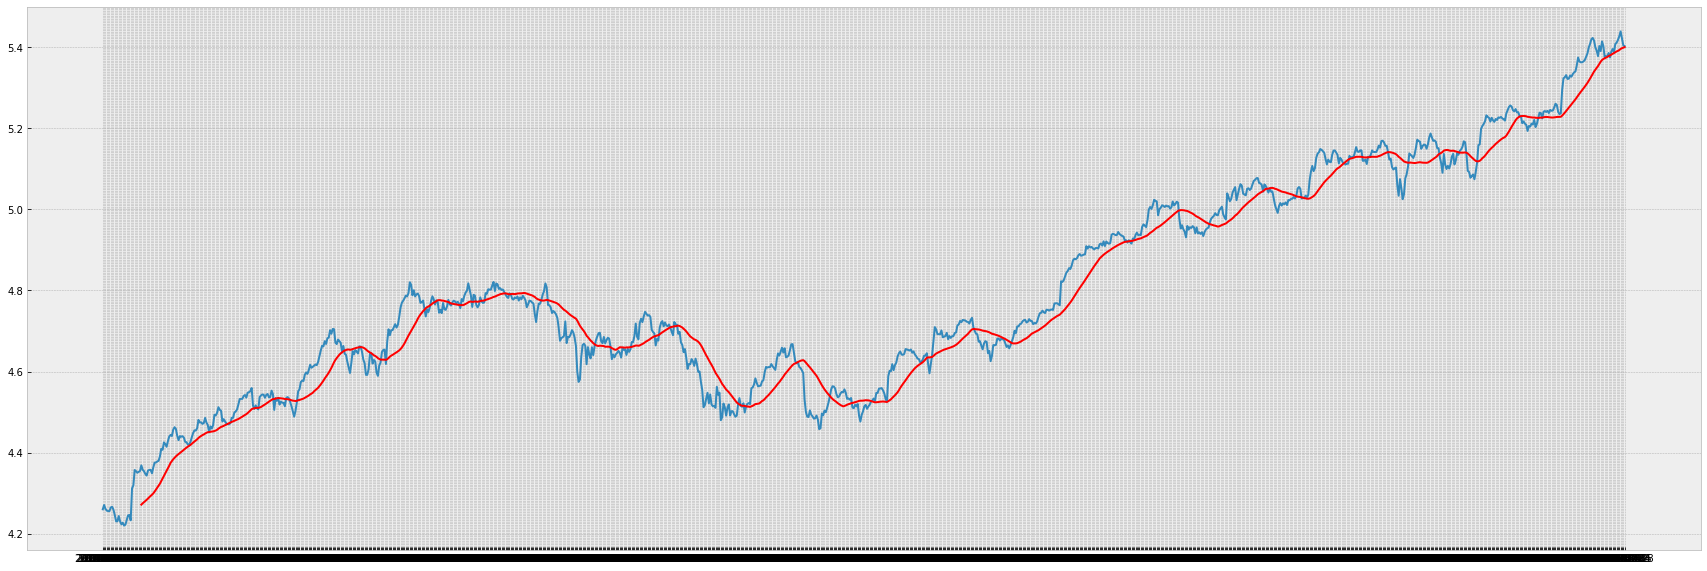

In [355]:
moving_avg = df_log.rolling(30).mean()
plt.plot(df_log)
plt.plot(moving_avg, color='red')

In [356]:
df_log_moving_avg_diff = df_log - moving_avg

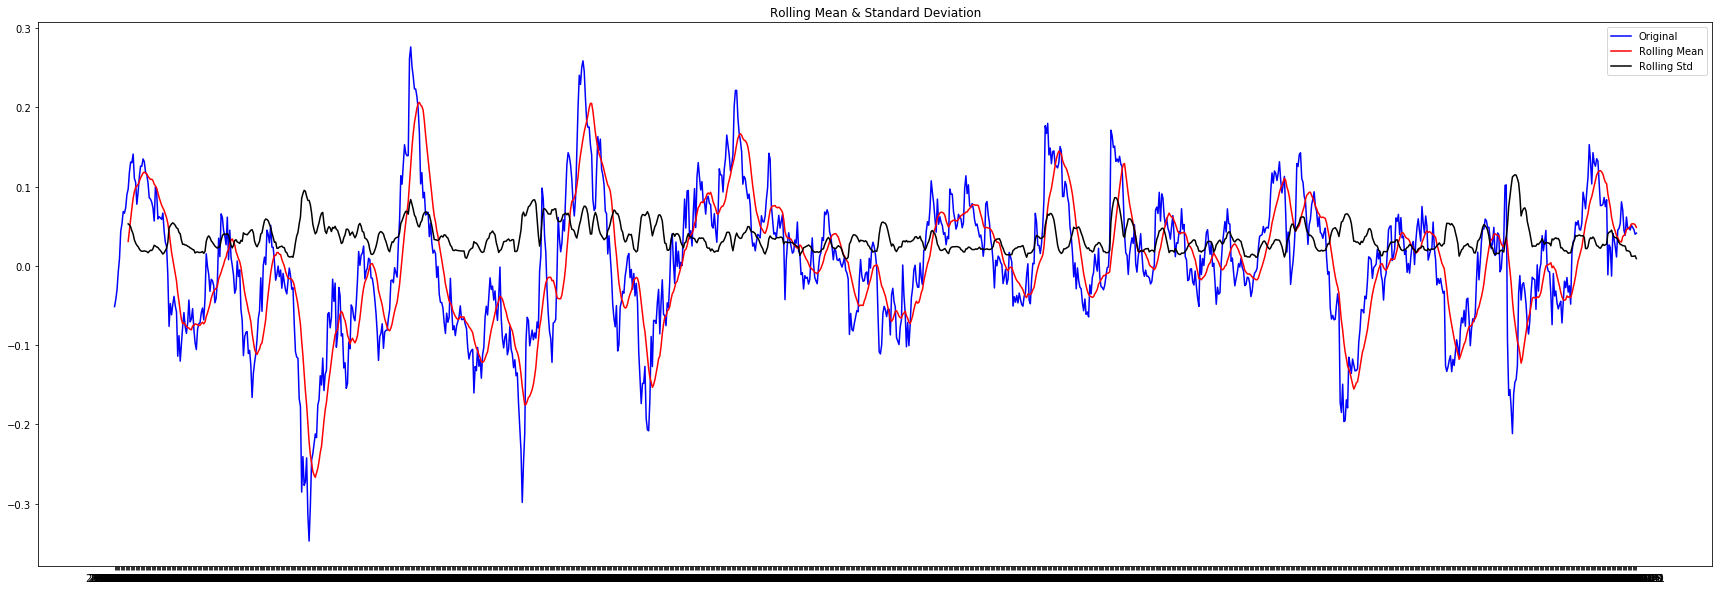

Results of Dickey-Fuller Test:
Test Statistic                   -5.552879
p-value                           0.000002
#Lags Used                        0.000000
Number of Observations Used    1228.000000
Critical Value (1%)              -3.435686
Critical Value (5%)              -2.863896
Critical Value (10%)             -2.568025
dtype: float64


In [35]:
df_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(df_log_moving_avg_diff)

### Weighted moving average

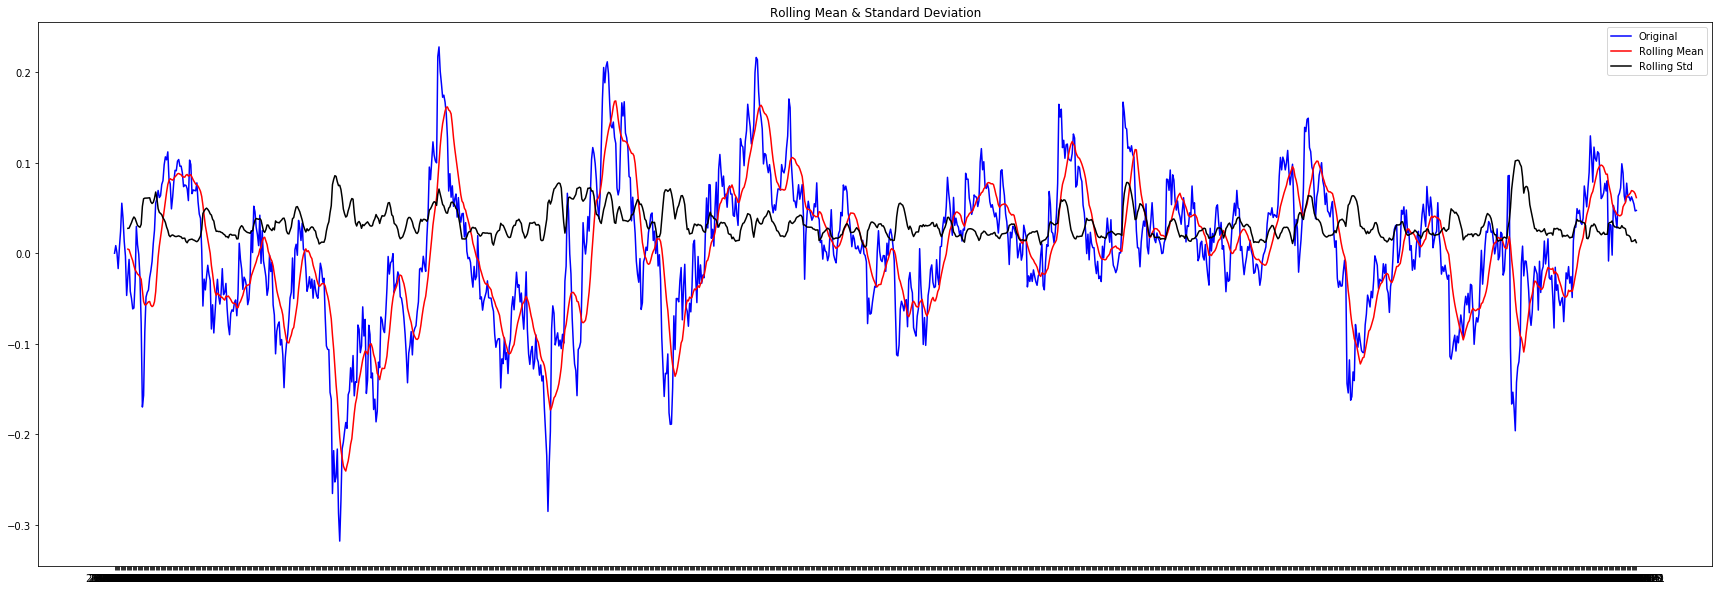

Results of Dickey-Fuller Test:
Test Statistic                -5.965091e+00
p-value                        1.996514e-07
#Lags Used                     0.000000e+00
Number of Observations Used    1.257000e+03
Critical Value (1%)           -3.435563e+00
Critical Value (5%)           -2.863842e+00
Critical Value (10%)          -2.567996e+00
dtype: float64


In [41]:
expwighted_avg = df_log.ewm(halflife=12).mean()
df_log_ewma_diff = df_log - expwighted_avg
test_stationarity(df_log_ewma_diff)

### Differencing

In [357]:
lrets=ts.diff(periods=2).dropna()
#lrets=np.log(ts/ts.shift(1))

TS = lrets.dropna()
TS.index = pd.DatetimeIndex(TS.index.values,
#                               freq=TS.index.inferred_freq)
                            freq='infer')

TS.head(5)

,close
2014-03-26,0.0775
2014-03-27,-0.9890
2014-03-28,-0.3835
2014-03-31,-0.0945
2014-04-01,0.6291


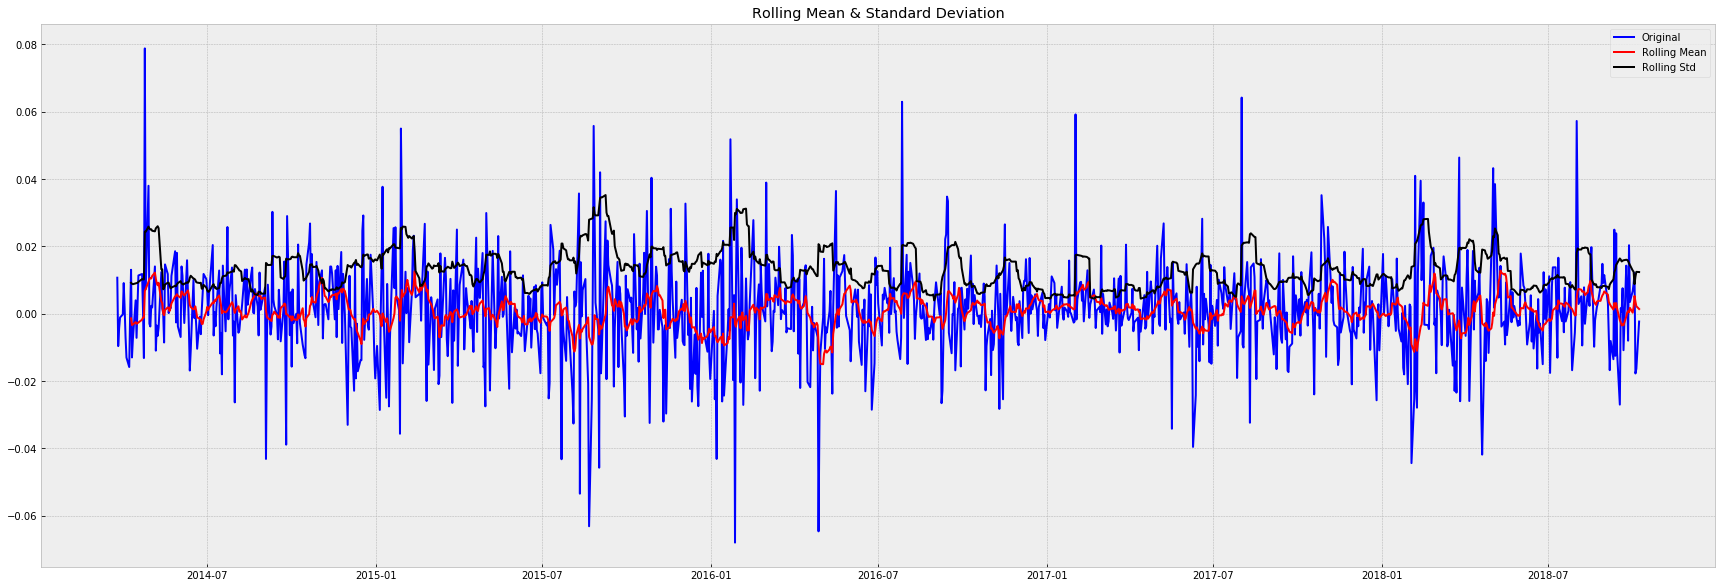

Results of Dickey-Fuller Test:
Test Statistic                  -32.675504
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1144.000000
Critical Value (1%)              -3.436079
Critical Value (5%)              -2.864070
Critical Value (10%)             -2.568117
dtype: float64


In [211]:
#df_log_diff.dropna(inplace=True)
test_stationarity(TS.close)

### Decomposition

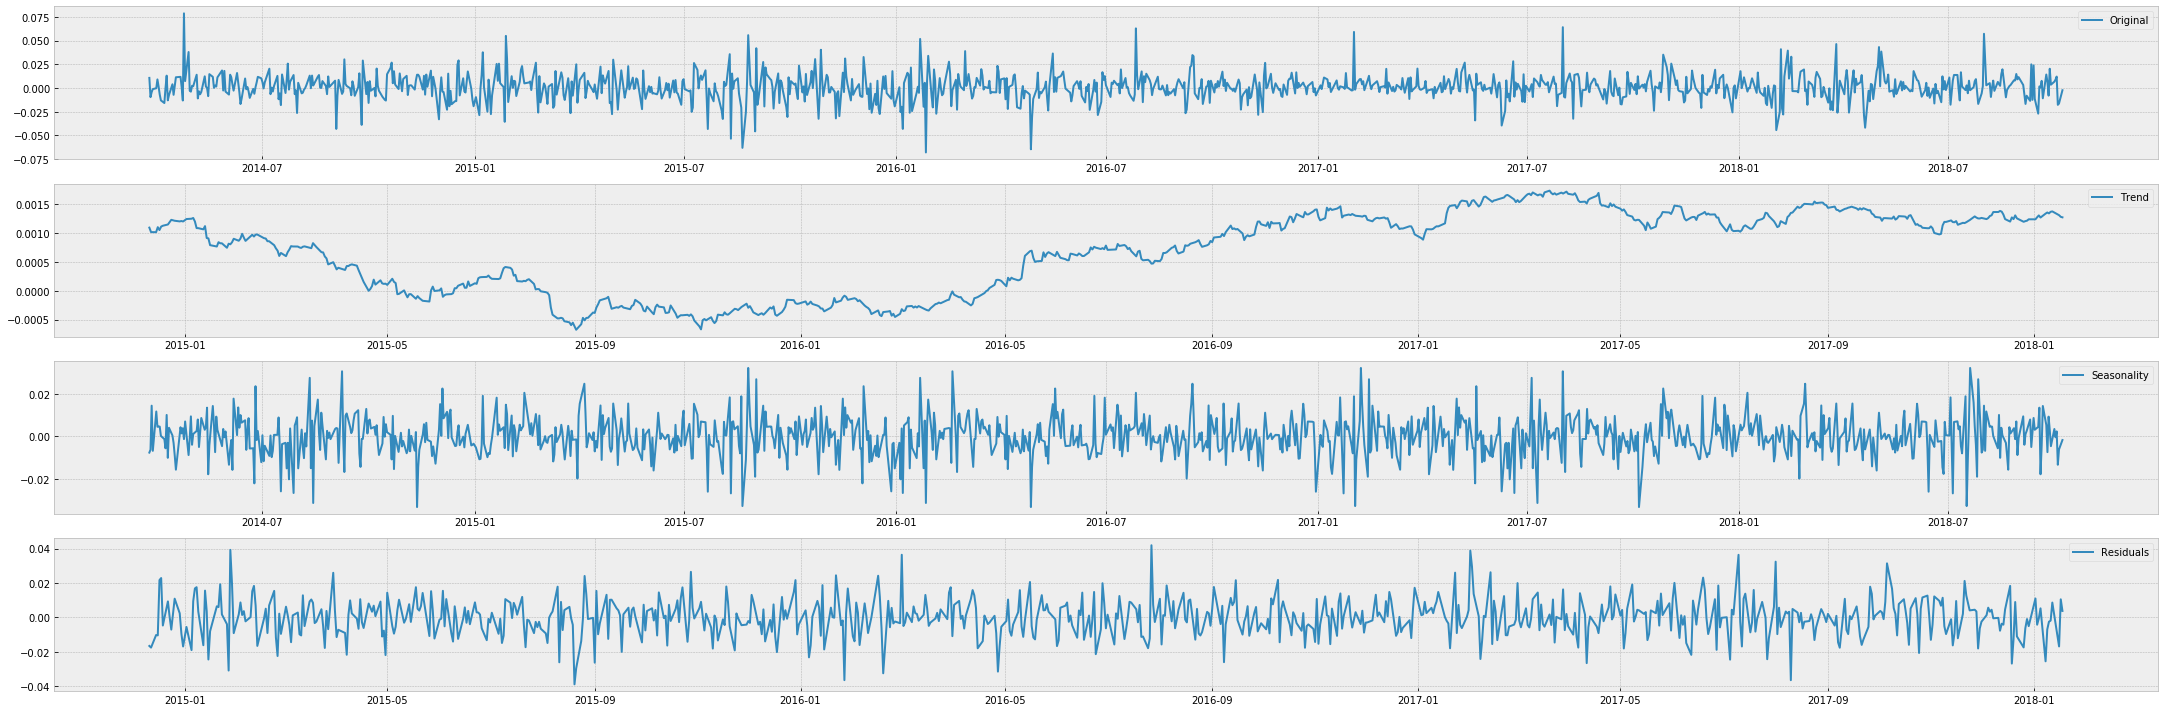

In [206]:
plt.rcParams['figure.figsize'] = 30, 10
from statsmodels.tsa.seasonal import seasonal_decompose

TS = lrets.dropna()
TS.index = pd.DatetimeIndex(TS.index.values,
#                               freq=TS.index.inferred_freq)
                            freq='infer')

decomposition = seasonal_decompose(TS, freq=365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(TS, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

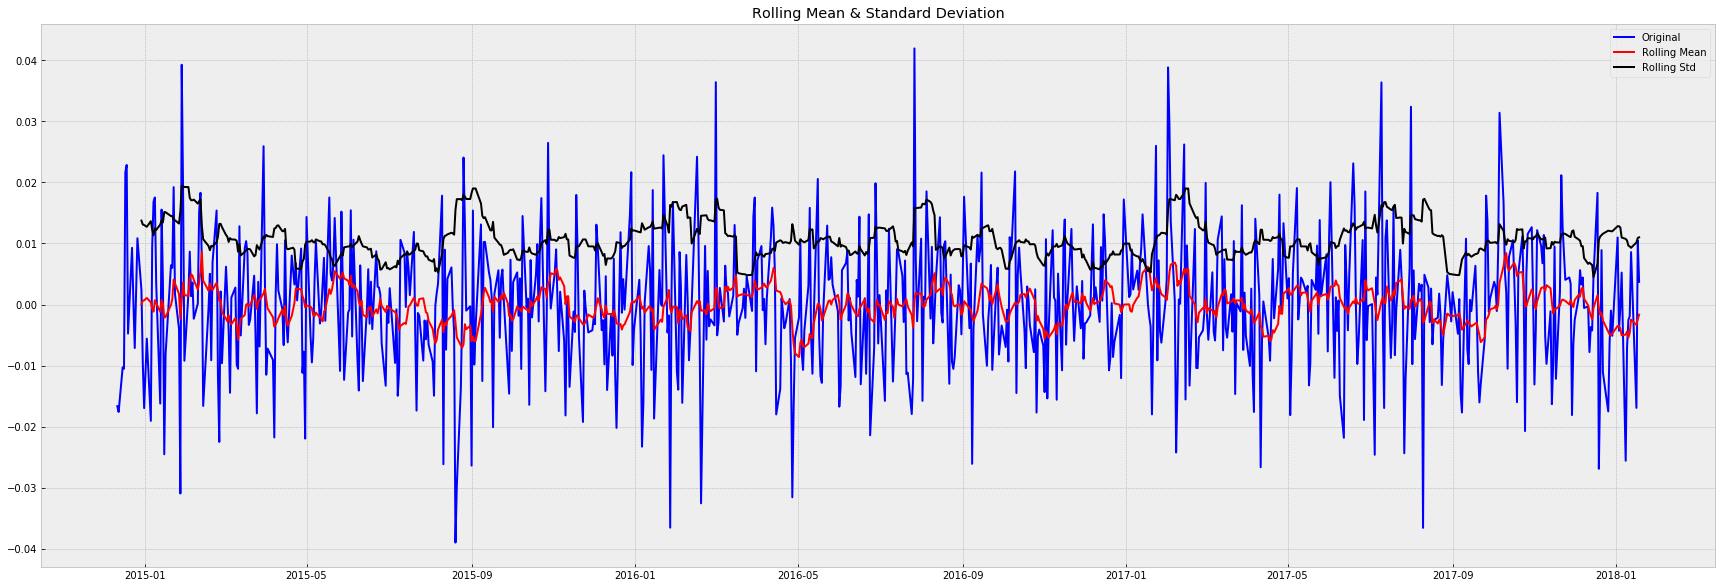

Results of Dickey-Fuller Test:
Test Statistic                -1.643048e+01
p-value                        2.481220e-29
#Lags Used                     3.000000e+00
Number of Observations Used    7.770000e+02
Critical Value (1%)           -3.438794e+00
Critical Value (5%)           -2.865267e+00
Critical Value (10%)          -2.568755e+00
dtype: float64


In [207]:
ts_log_decompose = residual.close
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

## Check for stationaruty by DF-test

In [273]:
test = sm.tsa.adfuller(TS.close)
print ('adf: ', test[0])
print ('p-value: ', test[1])
print('Critical values: \n', test[4])
if test[0]> test[4]['5%']: 
    print (' there are single roots, time series is not stationary ')
else:
    print ('no single roots, time series is  stationary')

adf:  -7.10772743817562
p-value:  4.0129385740221106e-10
Critical values: 
 {'1%': -3.4362020989495545, '5%': -2.864124028818559, '10%': -2.5681458107461737}
no single roots, time series is  stationary


## ACF and PACF:

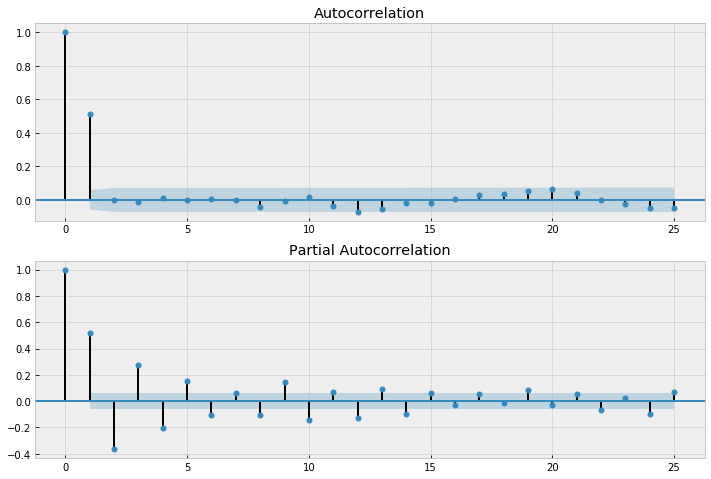

In [268]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(TS.close.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(TS.close, lags=25, ax=ax2)

In [269]:
p=2
q=2
d=2

In [270]:
mdl = smt.ARIMA(ts, order=(p,d,q)).fit(method='mle', trend='c')
aic = mdl.aic
mdl
print (mdl.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.close   No. Observations:                 1144
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -2290.525
Method:                           mle   S.D. of innovations              1.786
Date:                Tue, 26 Mar 2019   AIC                           4593.049
Time:                        21:27:32   BIC                           4623.303
Sample:                             2   HQIC                          4604.472
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0002      0.000      1.127      0.260      -0.000       0.001
ar.L1.D2.close    -0.8272      0.169     -4.897      0.000      -1.158      -0.496
ar.L2.D2.close     0.0373      0.032

In [72]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

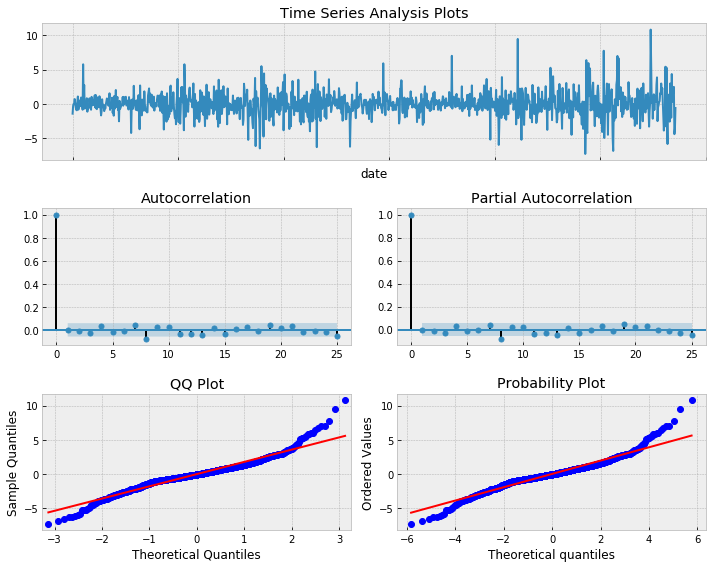

In [271]:
_ = tsplot(mdl.resid, lags=25)

In [272]:
#P-value>0.05 => no autocorrelation
sms.diagnostic.acorr_ljungbox(mdl.resid, lags=[20], boxpierce=False)

(array([23.59234233]), array([0.26065298]))

## Forecasting

In [373]:
# Create a 21 day forecast returns with 95%, 99% CI
n_steps = 30

f, err95, ci95 = mdl.forecast(steps=n_steps) # 95% CI
_, err99, ci99 = mdl.forecast(steps=n_steps, alpha=0.01) # 99% CI

idx = pd.date_range(ts.index[-1], periods=n_steps, freq='D', name="date")
fc_95 = pd.DataFrame(np.column_stack([f, ci95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([ci99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all

,forecast,lower_ci_95,lower_ci_99,upper_ci_95,upper_ci_99
date,,,,,
2018-10-08,222.215333,218.713934,217.613714,225.716732,226.816951
2018-10-09,222.484843,217.403794,215.807212,227.565892,229.162473
2018-10-10,222.702906,216.439007,214.470747,228.966805,230.935065
2018-10-11,222.967362,215.699626,213.415937,230.235099,232.518787
2018-10-12,223.191861,215.051646,212.493805,231.332076,233.889917
2018-10-13,223.451482,214.516770,211.709280,232.386193,235.193683
2018-10-14,223.680897,214.022289,210.987334,233.339505,236.374459
2018-10-15,223.936946,213.600533,210.352597,234.273359,237.521296
2018-10-16,224.170175,213.201412,209.754777,235.138938,238.585573


In [377]:
download_с=web.DataReader('AAPL', 'iex', start='10.08.2018', 
                        end='11.06.2018')
                        
ts_r=pd.DataFrame({'close': download_с.close})
ts_r.tail(5)

1y


,close
date,
2018-10-31,217.1675
2018-11-01,220.5015
2018-11-02,205.8755
2018-11-05,200.0311
2018-11-06,202.1942


In [392]:
ts_r.index = pd.to_datetime(ts_r.index)

In [403]:
#ts_r.index = pd.to_datetime(ts_r.index, unit='s')
ts_f=ts_r.resample('D').asfreq().interpolate(method='linear')
print (ts_f.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2018-10-08 to 2018-11-06
Freq: D
Data columns (total 1 columns):
close    30 non-null float64
dtypes: float64(1)
memory usage: 480.0 bytes
None


In [413]:
from sklearn.metrics import r2_score
r2_score(ts_f,fc_all.forecast)

-3.712450762264033

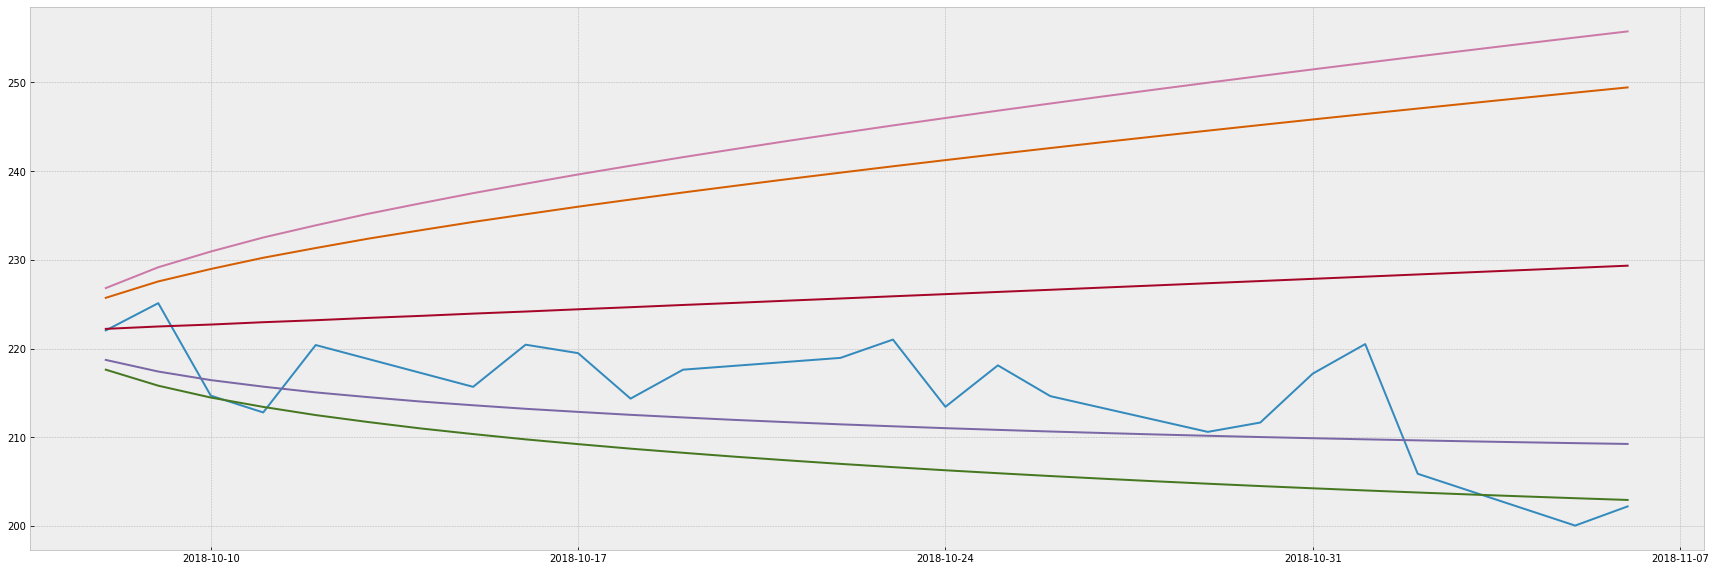

In [416]:
plt.plot(ts_f)
plt.plot(fc_all.forecast)
plt.plot(fc_all.lower_ci_95)
plt.plot(fc_all.lower_ci_99)
plt.plot(fc_all.upper_ci_95)
plt.plot(fc_all.upper_ci_99)

# Heteroscedastity and GARCH

In [221]:
import sys
!{sys.executable} -m pip install arch

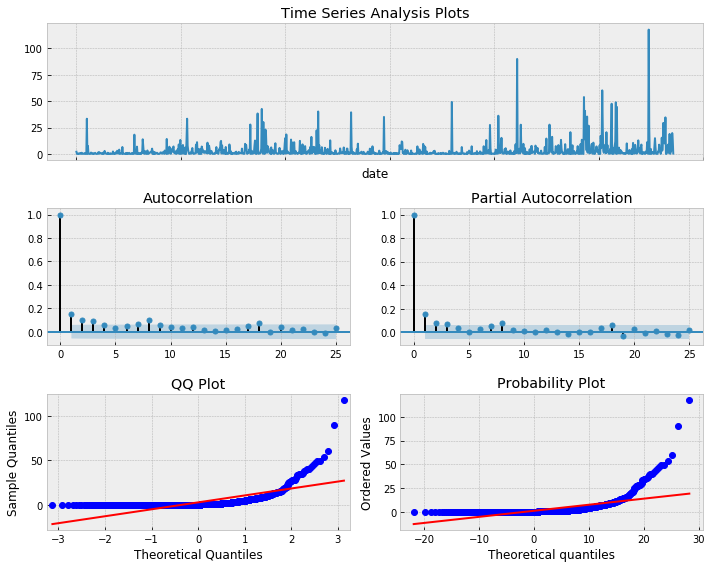

In [275]:
#model squares of residuals

_ = tsplot(mdl.resid**2, lags=25)

In [224]:
from arch import arch_model

In [370]:
# Using student T distribution usually provides better fit
#am = arch_model(mdl.resid, p=2, o=2, q=2, dist='StudentsT')
am=arch_model(mdl.resid, mean='constant', vol='GARCH', p=2,q=1, dist='StudentsT')

res = am.fit(update_freq=5, disp='on')
print(res.summary())

Iteration:      5,   Func. Count:     45,   Neg. LLF: 2149.027235001648
Iteration:     10,   Func. Count:     89,   Neg. LLF: 2140.7165962652152
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                         None   R-squared:                      -0.000
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                            GARCH   Log-Likelihood:               -2140.70
Distribution:      Standardized Student's t   AIC:                           4293.40
Method:                  Maximum Likelihood   BIC:                           4323.65
                                              No. Observations:                 1144
Date:                      Tue, Mar 26 2019   Df Residuals:                     1138
Time:                              23:21:12   Df Model:                            6
                                Mean Model                                
               

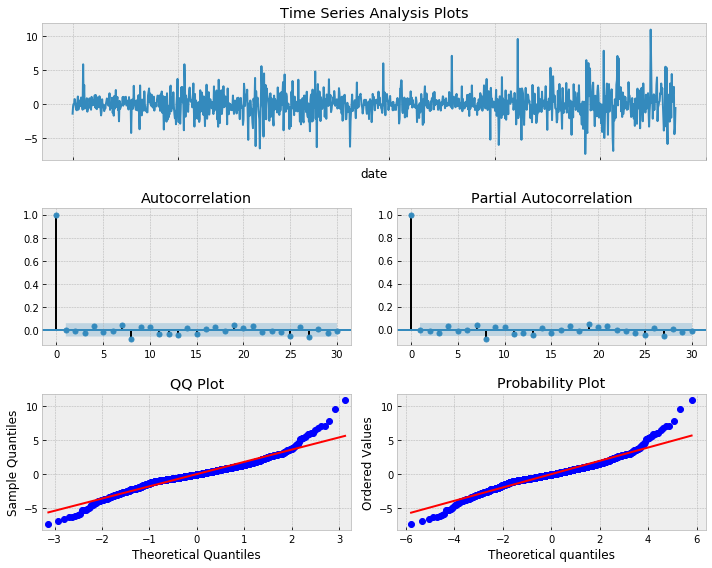

In [371]:
tsplot(res.resid, lags=30)

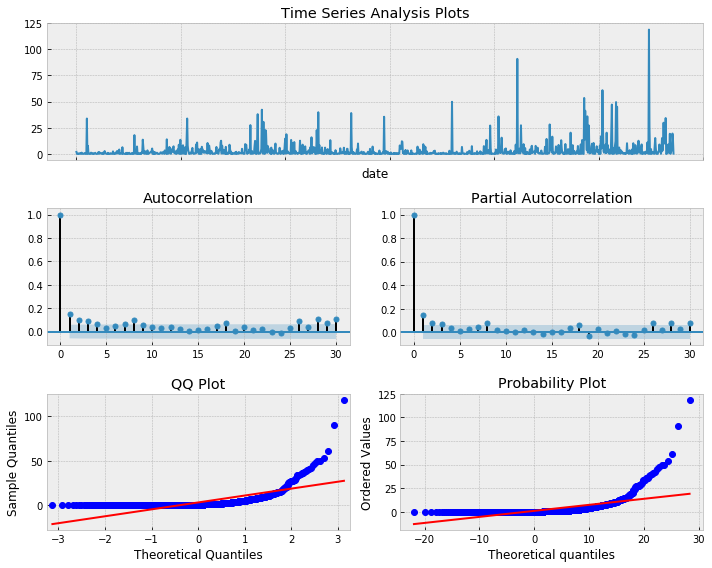

In [372]:
tsplot(res.resid**2, lags=30)

In [366]:
out = res.forecast(horizon=1, start=None, align='origin')
print(out.mean.iloc[-1])
print(out.variance.iloc[-1])

h.1   -0.014565
Name: 2018-10-08, dtype: float64
h.1    7.254556
Name: 2018-10-08, dtype: float64


In [420]:
am_ARCH=arch_model(mdl.resid, mean='constant', vol='ARCH', p=2,q=0, dist='StudentsT')

res_ARCH = am_ARCH.fit(update_freq=5, disp='on')
print(res_ARCH.summary())

Iteration:      5,   Func. Count:     40,   Neg. LLF: 2167.999143923836
Iteration:     10,   Func. Count:     79,   Neg. LLF: 2165.4679222401437
                         Constant Mean - ARCH Model Results                         
Dep. Variable:                         None   R-squared:                      -0.000
Mean Model:                   Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                             ARCH   Log-Likelihood:               -2165.43
Distribution:      Standardized Student's t   AIC:                           4340.85
Method:                  Maximum Likelihood   BIC:                           4366.06
                                              No. Observations:                 1144
Date:                      Wed, Mar 27 2019   Df Residuals:                     1139
Time:                              00:05:17   Df Model:                            5
                                  Mean Model                                 
            

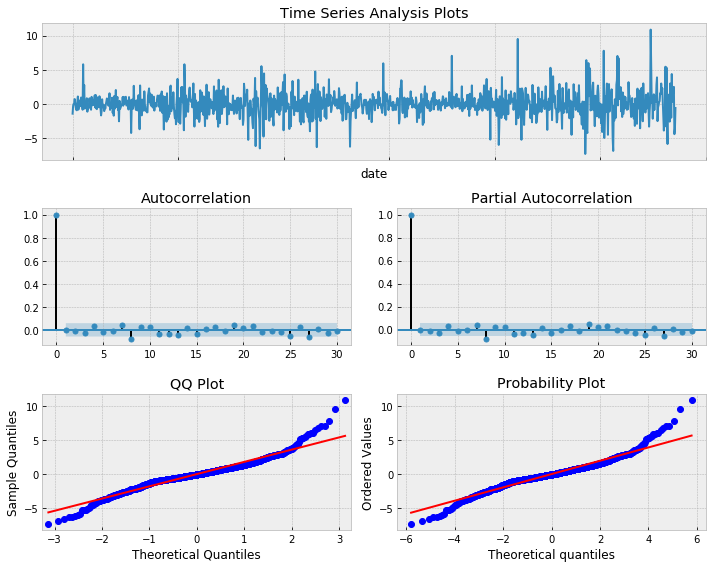

In [421]:
tsplot(res_ARCH.resid, lags=30)

In [422]:
out_ARCH = res_ARCH.forecast(horizon=1, start=None, align='origin')
print(out_ARCH.mean.iloc[-1])
print(out_ARCH.variance.iloc[-1])

h.1   -0.022505
Name: 2018-10-08, dtype: float64
h.1    4.208439
Name: 2018-10-08, dtype: float64
